In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)

TRAINING_PERCENT = 0.8

In [2]:
data_table = pd.DataFrame(pd.read_csv('Housing.csv'))
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
m = len(data_table)

print(f"m = {m}")
print(f"shape = {np.shape(data_table)}")

# creates a list of all variables from the column names
var_list = data_table.columns
var_list = list(var_list)
num_vars = len(var_list)

y_var_list = [var_list[0]]

print(f"exp_var = {var_list}")
print(f"y_var = {y_var_list}")

m = 545
shape = (545, 13)
exp_var = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
y_var = ['price']


In [4]:
# Maps to turn categorys into numbers 
def boolean_map(x):
    return x.map({'yes': 1 , 'no': 0})
def furnish_map(x):
    return x.map({'furnished': 2 , 'semi-furnished': 1 , 'unfurnished': 0})
def scaled_furnish_map(x):
    return x.map({'furnished': 1 , 'semi-furnished': 0.5 , 'unfurnished': 0})

# Extracts the yes and no column names
binary_vars = [*var_list[5:10] , var_list[11]]
print(f"binary vars = {binary_vars}")

# Extracts the furnishing column names
furnish_vars = [var_list[12]]
print(f"furnish vars = {furnish_vars}")

# Extracts the column names that are actual values
valued_vars = var_list.copy()
[valued_vars.remove( item ) for item in binary_vars]
[valued_vars.remove( item ) for item in furnish_vars]
print(f"value vars = {valued_vars}")

binary vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnish vars = ['furnishingstatus']
value vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [5]:
def plot_2_sets_of_data(iterations:int, cost_history, validation_history, color_1:str = "blue", color_2:str = "red"):
    """
    Allows for plotting of the two data sets in one simple function

    Args:
        iterations (int): number of iterations in data
        cost_history (list): loss values for the training set
        validation_history (list): loss values for the validation set
        color_1 (str, optional): string of the color for the plotted cost history. Defaults to "blue".
        color_2 (str, optional): string of the color for the plotted validation history. Defaults to "red".
    """
    plt.plot(range(1, iterations + 1),cost_history, color=color_1) 
    plt.plot(range(1, iterations + 1),validation_history, color=color_2) 
    plt.rcParams["figure.figsize"] = (10,6) 
    plt.grid() 
    plt.xlabel('Number of iterations') 
    plt.ylabel('Cost (J)') 
    plt.title(f'Convergence of gradient descent') ;

# It is at this point that we can start to seperate the assignment into the various questions.

# Question 1

## setup

In [6]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
unscaled_data = data_table.copy()

# scaler = StandardScaler()
scaler = MinMaxScaler()

unscaled_data[binary_vars] = unscaled_data[binary_vars].apply(boolean_map)
unscaled_data[furnish_vars] = unscaled_data[furnish_vars].apply(furnish_map)

unscaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [8]:
data_train, data_test = train_test_split(unscaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [9]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0,1


In [10]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
239,4585000,4000,3,1,2,1,0,0,0,0,1,0,2
113,6083000,9620,3,1,1,1,0,1,0,0,2,1,2
325,4007500,3460,4,1,2,1,0,0,0,1,0,0,1
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,2
479,2940000,3660,4,1,2,0,0,0,0,0,0,0,0


In [11]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [12]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,3620,2,1,1,1,0,0,0,0,0,0,0
496,4000,2,1,1,1,0,0,0,0,0,0,0
484,3040,2,1,1,0,0,0,0,0,0,0,0
507,3600,2,1,1,1,0,0,0,0,0,0,0
252,9860,3,1,1,1,0,0,0,0,0,0,1


In [13]:
print(y_train_values.shape)
y_train_values.head()

(436,)


542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
Name: price, dtype: int64

In [14]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
239,4000,3,1,2,1,0,0,0,0,1,0,2
113,9620,3,1,1,1,0,1,0,0,2,1,2
325,3460,4,1,2,1,0,0,0,1,0,0,1
66,13200,2,1,1,1,0,1,1,0,1,0,2
479,3660,4,1,2,0,0,0,0,0,0,0,0


In [15]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64

In [16]:
def compute_cost(x, y, theta, debug:bool=False): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(1 x m) 

    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 

    Output Parameters 
    ----------------- 
    J : Scalar value. 
    """ 
    if(debug):
        print("x shape = ", np.shape(x))
        print("y shape = ", np.shape(y))
        print("theta shape = ", np.shape(theta))
        
    predictions = x.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum( sqrErrors ) 

    if(debug):
        print(sqrErrors)
        print(J)

    return J 

In [17]:
def gradient_descent(x, y, theta, alpha:float, iterations:int, validation_x, validation_y, debug: bool = False): 
    """ 
    Compute cost for linear regression. 

    Args:
        x : 2D array where each row represent the training example and each column represent 
            m= number of training examples 
            n= number of features (including X_0 column of ones) 
        y : 1D array of labels/target value for each traing example. dimension(m x 1) 
        theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
        alpha (float): Learning rate
        iterations (int): Number of iterations
        validation_x : _description_
        validation_y : _description_
        debug (bool, optional): a print debug shape line. Defaults to False.

    Returns:
        theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
        cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
        validation_costs: Conatins validation loss value for each iteration. 1D array. Dimansion(m x 1) 
    """
    cost_history = np.zeros(iterations) 
    validation_cost = np.zeros(iterations) 
    
    for i in range(iterations): 
        predictions = x.dot(theta) 
        if debug:
            print(f"x = {x.shape}")
            print(f"y = {y.shape}")
            print(f"predictions: {predictions.shape}")
        errors = np.subtract(predictions, y) 
        if debug:
            print(f"errors: {errors.shape}")
            print(type(errors))
        transposed = x.transpose()
        if debug: 
            print(f"transposed = {transposed.shape}")
        sum_delta = (alpha / m) * (transposed).dot(errors); 
        if debug:
            print(f"sum_delta: {sum_delta.shape}")
        theta = theta - sum_delta; 
        if debug:
            print(f"theta: {theta.shape}\n\n")
        cost_history[i] = compute_cost(x, y, theta) 
        validation_cost[i] = compute_cost(validation_x, validation_y, theta)   
    
    return theta, cost_history, validation_cost

## 1a

In [18]:
used_vars_a = ["area", "bedrooms", "bathrooms", "stories", "parking",] 
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item) #if it doesn exist in the first set then its not in the second
    except KeyError:
        pass

In [19]:
print(used_train_x.shape)
used_train_x.head()


(436, 5)


,area,bedrooms,bathrooms,stories,parking
542,3620,2,1,1,0
496,4000,2,1,1,0
484,3040,2,1,1,0
507,3600,2,1,1,0
252,9860,3,1,1,0


In [20]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
239,4000,3,1,2,1
113,9620,3,1,1,2
325,3460,4,1,2,0
66,13200,2,1,1,1
479,3660,4,1,2,0


In [21]:
print(y_train_values.shape)
y_train_values.head()

(436,)


542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
Name: price, dtype: int64

In [22]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64

In [23]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

print(X.shape)
print(Y.shape)

(436, 6)
(436,)


In [24]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

print(valid_X.shape)
print(valid_Y.shape)

(109, 6)
(109,)


In [25]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.00e+00 3.62e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 4.00e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 3.04e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 ...
 [1.00e+00 5.75e+03 3.00e+00 2.00e+00 4.00e+00 1.00e+00]
 [1.00e+00 3.60e+03 3.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 6.60e+03 3.00e+00 1.00e+00 1.00e+00 0.00e+00]]

Y=
[ 1750000  2695000  2870000  2590000  4515000  4410000  4585000  5250000
  3570000  3640000  9800000  2940000  6083000  3255000  4893000  3150000
  2975000  6930000  3500000  5880000  3500000  4235000  3710000  4060000
  2345000  4550000 10150000  3640000  2660000  2233000  2135000  4277000
  6230000  6300000  3920000  7350000  8400000  5215000  7420000  6230000
  4900000  4550000  4060000  3010000  7343000  5600000  7140000 10150000
  9870000  3780000  2940000  2653000  3836000  4760000  7962500  3143000
  3500000  4690000  4340000  4515000  1767150  3080000  5950000  5530000
  3150000  7210000  2800000  3045000  2835000  1820000  34650

In [26]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [27]:

# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y, theta, debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y, theta, debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 10587991986906.973
The validation cost for given values of theta = 2518924377752.294


Final values:
	theta = [1.50397719e-01 7.63577767e+02 4.74344739e-01 2.18887839e-01
 3.14800822e-01 1.29108383e-01]
	cost = 1481869421322.4353
	validation_cost = 324051102777.2581


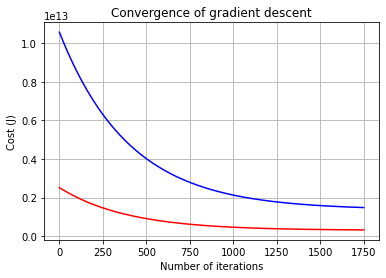

In [28]:
theta = np.zeros(X.shape[1])
iterations = 1750; 
alpha = 0.00000000005; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history)

## 1b

In [29]:
used_vars_b = ["Area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea"]
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        pass

In [30]:
print(used_train_x.shape)
used_train_x.head()

(436, 10)


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,2,1,1,1,0,0,0,0,0,0
496,2,1,1,1,0,0,0,0,0,0
484,2,1,1,0,0,0,0,0,0,0
507,2,1,1,1,0,0,0,0,0,0
252,3,1,1,1,0,0,0,0,0,0


In [31]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 10)


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
239,3,1,2,1,0,0,0,0,1,0
113,3,1,1,1,0,1,0,0,2,1
325,4,1,2,1,0,0,0,1,0,0
66,2,1,1,1,0,1,1,0,1,0
479,4,1,2,0,0,0,0,0,0,0


In [32]:
print(y_train_values.shape)
y_train_values.head()

(436,)


542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
Name: price, dtype: int64

In [33]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64

In [34]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

print(X.shape)
print(Y.shape)

(436, 11)
(436,)


In [35]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

print(valid_X.shape)
print(valid_Y.shape)

(109, 11)
(109,)


In [36]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1. 2. 1. ... 0. 0. 0.]
 [1. 2. 1. ... 0. 0. 0.]
 [1. 2. 1. ... 0. 0. 0.]
 ...
 [1. 3. 2. ... 1. 1. 1.]
 [1. 3. 1. ... 0. 1. 0.]
 [1. 3. 1. ... 0. 0. 1.]]

Y=
[ 1750000  2695000  2870000  2590000  4515000  4410000  4585000  5250000
  3570000  3640000  9800000  2940000  6083000  3255000  4893000  3150000
  2975000  6930000  3500000  5880000  3500000  4235000  3710000  4060000
  2345000  4550000 10150000  3640000  2660000  2233000  2135000  4277000
  6230000  6300000  3920000  7350000  8400000  5215000  7420000  6230000
  4900000  4550000  4060000  3010000  7343000  5600000  7140000 10150000
  9870000  3780000  2940000  2653000  3836000  4760000  7962500  3143000
  3500000  4690000  4340000  4515000  1767150  3080000  5950000  5530000
  3150000  7210000  2800000  3045000  2835000  1820000  3465000  4200000
  5040000  7350000  5250000  4690000  4900000  5495000  1750000  8120000
  3675000  8890000  3920000  4550000  2275000  7350000  6650000  8463000
  5250000  6405000  5285000 114100

In [37]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(11,)
(436, 11)
(109, 11)


In [38]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y, theta, debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y, theta, debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 10587991986906.973
The validation cost for given values of theta = 2518924377752.294


Final values:
	theta = [272612.58280326 810074.7102166  405599.52600174 527628.79441663
 265150.0047652   83568.74682399 126518.5611668   17722.61563488
 148773.73814126 276547.14041501 122510.96840463]
	cost = 869012045804.2721
	validation_cost = 172113221176.09033


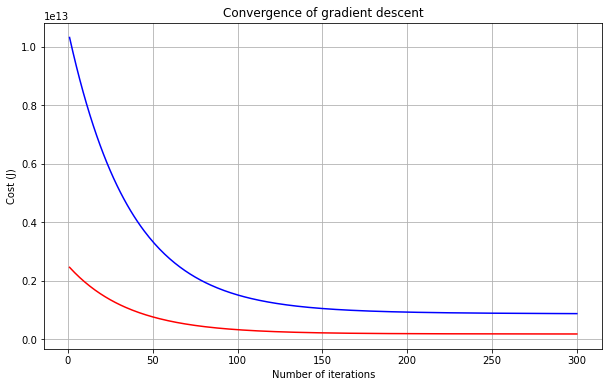

In [39]:
theta = np.zeros(X.shape[1])
iterations = 300; 
alpha = 0.001; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history)

# Question 2

## Normalization run

### setup

In [40]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [41]:
scaled_data = data_table.copy()

# scaler = StandardScaler()
scaler = MinMaxScaler()

scaled_data[valued_vars] = scaler.fit_transform(scaled_data[valued_vars])
scaled_data[binary_vars] = scaled_data[binary_vars].apply(boolean_map)
scaled_data[furnish_vars] = scaled_data[furnish_vars].apply(scaled_furnish_map)

scaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0


In [42]:
data_train, data_test = train_test_split(scaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [43]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
267,0.229697,0.224742,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0,0.5
336,0.187879,0.441924,0.4,0.000000,0.000000,1,0,0,0,1,0.666667,0,0.5
202,0.272727,0.169759,0.2,0.000000,0.000000,1,0,1,0,0,0.333333,0,0.5
339,0.184848,0.105155,0.6,0.333333,0.333333,1,0,0,0,0,0.000000,0,1.0
103,0.384848,0.323024,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0,1.0


In [44]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
320,0.200000,0.183505,0.4,0.0,0.333333,1,0,0,0,0,0.666667,1,1.0
312,0.203333,0.134021,0.4,0.0,0.000000,1,0,1,0,1,0.000000,1,1.0
401,0.151515,0.539519,0.4,0.0,0.333333,1,0,0,0,0,1.000000,1,0.0
431,0.133333,0.105155,0.6,0.0,0.333333,1,0,1,0,1,0.000000,0,0.0
520,0.060606,0.415808,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0.0


In [45]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [46]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
267,0.224742,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0,0.5
336,0.441924,0.4,0.000000,0.000000,1,0,0,0,1,0.666667,0,0.5
202,0.169759,0.2,0.000000,0.000000,1,0,1,0,0,0.333333,0,0.5
339,0.105155,0.6,0.333333,0.333333,1,0,0,0,0,0.000000,0,1.0
103,0.323024,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0,1.0


In [47]:
print(y_train_values.shape)
y_train_values.head()

(436,)


267    0.229697
336    0.187879
202    0.272727
339    0.184848
103    0.384848
Name: price, dtype: float64

In [48]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
320,0.183505,0.4,0.0,0.333333,1,0,0,0,0,0.666667,1,1.0
312,0.134021,0.4,0.0,0.000000,1,0,1,0,1,0.000000,1,1.0
401,0.539519,0.4,0.0,0.333333,1,0,0,0,0,1.000000,1,0.0
431,0.105155,0.6,0.0,0.333333,1,0,1,0,1,0.000000,0,0.0
520,0.415808,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0.0


In [49]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


320    0.200000
312    0.203333
401    0.151515
431    0.133333
520    0.060606
Name: price, dtype: float64

In [50]:
def compute_cost(x, y, theta, debug:bool=False): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(1 x m) 

    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 

    Output Parameters 
    ----------------- 
    J : Scalar value. 
    """ 
    if(debug):
        print("x shape = ", np.shape(x))
        print("y shape = ", np.shape(y))
        print("theta shape = ", np.shape(theta))
        
    predictions = x.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum( sqrErrors ) 

    if(debug):
        print(sqrErrors)
        print(J)

    return J 

In [51]:
def gradient_descent(x, y, theta, alpha:float, iterations:int, validation_x, validation_y, debug: bool = False): 
    """ 
    Compute cost for linear regression. 

    Args:
        x : 2D array where each row represent the training example and each column represent 
            m= number of training examples 
            n= number of features (including X_0 column of ones) 
        y : 1D array of labels/target value for each traing example. dimension(m x 1) 
        theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
        alpha (float): Learning rate
        iterations (int): Number of iterations
        validation_x : _description_
        validation_y : _description_
        debug (bool, optional): a print debug shape line. Defaults to False.

    Returns:
        theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
        cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
        validation_costs: Conatins validation loss value for each iteration. 1D array. Dimansion(m x 1) 
    """
    cost_history = np.zeros(iterations) 
    validation_cost = np.zeros(iterations) 
    
    for i in range(iterations): 
        predictions = x.dot(theta) 
        if debug:
            print(f"x = {x.shape}")
            print(f"y = {y.shape}")
            print(f"predictions: {predictions.shape}")
        errors = np.subtract(predictions, y) 
        if debug:
            print(f"errors: {errors.shape}")
            print(type(errors))
        transposed = x.transpose()
        if debug: 
            print(f"transposed = {transposed.shape}")
        sum_delta = (alpha / m) * (transposed).dot(errors); 
        if debug:
            print(f"sum_delta: {sum_delta.shape}")
        theta = theta - sum_delta; 
        if debug:
            print(f"theta: {theta.shape}\n\n")
        cost_history[i] = compute_cost(x, y, theta) 
        validation_cost[i] = compute_cost(validation_x, validation_y, theta)   
    
    return theta, cost_history, validation_cost

### 2a

In [52]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        pass

In [53]:
print(used_train_x.shape)
used_train_x.head()

(436, 5)


,area,bedrooms,bathrooms,stories,parking
267,0.224742,0.4,0.000000,0.333333,0.333333
336,0.441924,0.4,0.000000,0.000000,0.666667
202,0.169759,0.2,0.000000,0.000000,0.333333
339,0.105155,0.6,0.333333,0.333333,0.000000
103,0.323024,0.4,0.333333,0.666667,0.000000


In [54]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
320,0.183505,0.4,0.0,0.333333,0.666667
312,0.134021,0.4,0.0,0.000000,0.000000
401,0.539519,0.4,0.0,0.333333,1.000000
431,0.105155,0.6,0.0,0.333333,0.000000
520,0.415808,0.2,0.0,0.000000,0.000000


In [55]:
print(y_train_values.shape)
y_train_values.head()

(436,)


267    0.229697
336    0.187879
202    0.272727
339    0.184848
103    0.384848
Name: price, dtype: float64

In [56]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


320    0.200000
312    0.203333
401    0.151515
431    0.133333
520    0.060606
Name: price, dtype: float64

In [57]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

print(X.shape)
print(Y.shape)

(436, 6)
(436,)


In [58]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

print(valid_X.shape)
print(valid_Y.shape)

(109, 6)
(109,)


In [59]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.         0.22474227 0.4        0.         0.33333333 0.33333333]
 [1.         0.4419244  0.4        0.         0.         0.66666667]
 [1.         0.16975945 0.2        0.         0.         0.33333333]
 ...
 [1.         0.36769759 0.4        0.         0.33333333 0.        ]
 [1.         0.11271478 0.2        0.         0.         0.33333333]
 [1.         0.35395189 0.2        0.         0.         0.66666667]]

Y=
[0.22969697 0.18787879 0.27272727 0.18484848 0.38484848 0.13333333
 0.06060606 0.07818182 0.63636364 0.22242424 0.17515152 0.16909091
 0.20545455 0.12121212 0.1030303  0.14484848 0.13333333 0.27272727
 0.16060606 0.49090909 0.29393939 0.32121212 0.27878788 0.16969697
 0.5030303  0.13333333 0.29090909 0.58787879 0.14242424 0.07878788
 0.39393939 0.3030303  0.09393939 0.21818182 0.17878788 0.36363636
 0.06666667 0.39333333 0.42121212 0.33787879 0.29393939 0.42424242
 0.06666667 0.07878788 0.35636364 0.27212121 0.59090909 0.35151515
 0.22424242 0.13636364 0.21878788 0.4

In [60]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [61]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y, theta, debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y, theta, debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.03865535036483264
The validation cost for given values of theta = 0.008543091802090967


Final values:
	theta = [0.15688055 0.09327522 0.08948671 0.06869038 0.10250618 0.09496465]
	cost = 0.0066299214762571175
	validation_cost = 0.0015978935951137421


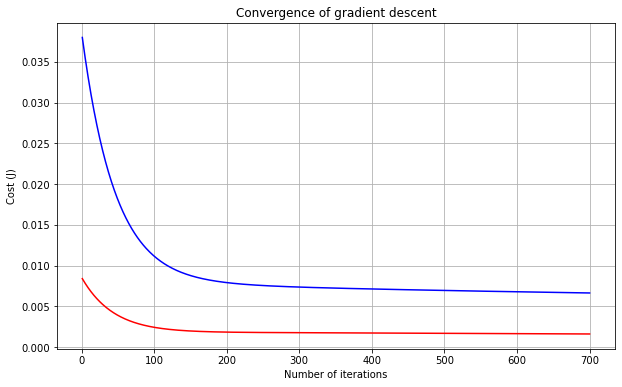

In [62]:
theta = np.zeros(X.shape[1])
iterations = 700; 
alpha = 0.01; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history)

### 2b

In [63]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        pass

In [64]:
print(used_train_x.shape)
used_train_x.head()

(436, 10)


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
267,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0
336,0.4,0.000000,0.000000,1,0,0,0,1,0.666667,0
202,0.2,0.000000,0.000000,1,0,1,0,0,0.333333,0
339,0.6,0.333333,0.333333,1,0,0,0,0,0.000000,0
103,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0


In [65]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 10)


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
320,0.4,0.0,0.333333,1,0,0,0,0,0.666667,1
312,0.4,0.0,0.000000,1,0,1,0,1,0.000000,1
401,0.4,0.0,0.333333,1,0,0,0,0,1.000000,1
431,0.6,0.0,0.333333,1,0,1,0,1,0.000000,0
520,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0


In [66]:
print(y_train_values.shape)
y_train_values.head()

(436,)


267    0.229697
336    0.187879
202    0.272727
339    0.184848
103    0.384848
Name: price, dtype: float64

In [67]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


320    0.200000
312    0.203333
401    0.151515
431    0.133333
520    0.060606
Name: price, dtype: float64

In [68]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

print(X.shape)
print(Y.shape)

(436, 11)
(436,)


In [69]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

print(valid_X.shape)
print(valid_Y.shape)

(109, 11)
(109,)


In [70]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.         0.4        0.         ... 0.         0.33333333 0.        ]
 [1.         0.4        0.         ... 1.         0.66666667 0.        ]
 [1.         0.2        0.         ... 0.         0.33333333 0.        ]
 ...
 [1.         0.4        0.         ... 0.         0.         0.        ]
 [1.         0.2        0.         ... 0.         0.33333333 0.        ]
 [1.         0.2        0.         ... 0.         0.66666667 0.        ]]

Y=
[0.22969697 0.18787879 0.27272727 0.18484848 0.38484848 0.13333333
 0.06060606 0.07818182 0.63636364 0.22242424 0.17515152 0.16909091
 0.20545455 0.12121212 0.1030303  0.14484848 0.13333333 0.27272727
 0.16060606 0.49090909 0.29393939 0.32121212 0.27878788 0.16969697
 0.5030303  0.13333333 0.29090909 0.58787879 0.14242424 0.07878788
 0.39393939 0.3030303  0.09393939 0.21818182 0.17878788 0.36363636
 0.06666667 0.39333333 0.42121212 0.33787879 0.29393939 0.42424242
 0.06666667 0.07878788 0.35636364 0.27212121 0.59090909 0.35151515
 0.22424242 0

In [71]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(11,)
(436, 11)
(109, 11)


In [72]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y, theta, debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y, theta, debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.03865535036483264
The validation cost for given values of theta = 0.008543091802090967


Final values:
	theta = [0.08116592 0.05279406 0.04584746 0.06674518 0.0805639  0.03482252
 0.03830208 0.01838029 0.08571471 0.0580292  0.05406244]
	cost = 0.005316849147005517
	validation_cost = 0.0014149760752073452


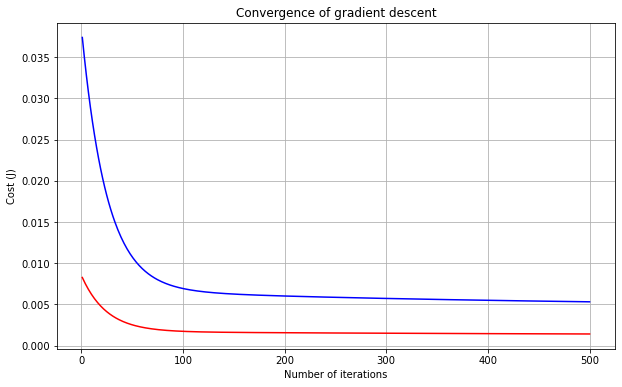

In [73]:
theta = np.zeros(X.shape[1])
iterations = 500; 
alpha = 0.01; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history)

## Standardization

### setup

In [74]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [75]:
scaled_data = data_table.copy()

scaler = StandardScaler()
# scaler = MinMaxScaler()

scaled_data[valued_vars] = scaler.fit_transform(scaled_data[valued_vars])
scaled_data[binary_vars] = scaled_data[binary_vars].apply(boolean_map)
scaled_data[furnish_vars] = scaled_data[furnish_vars].apply(scaled_furnish_map)

scaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.5
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1.0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1.0


In [76]:
data_train, data_test = train_test_split(scaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [77]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
462,-0.902611,-1.379306,0.047278,-0.570187,0.224410,0,0,1,0,0,-0.805741,0,0.5
166,0.296069,1.221991,0.047278,-0.570187,-0.929397,1,0,1,0,1,1.517692,1,0.0
539,-1.558139,-0.996491,-1.308863,-0.570187,-0.929397,0,0,0,0,0,0.355976,0,0.0
163,0.352257,0.772299,0.047278,-0.570187,-0.929397,1,1,1,0,1,-0.805741,1,0.5
466,-0.940069,-0.950369,0.047278,-0.570187,0.224410,0,0,0,0,0,-0.805741,0,0.5


In [78]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
76,1.007785,0.585503,0.047278,1.421812,1.378217,1,0,0,0,1,-0.805741,1,1.0
308,-0.322000,-0.509440,0.047278,-0.570187,0.224410,1,0,1,0,0,0.355976,0,0.5
341,-0.490565,-0.908859,-1.308863,1.421812,-0.929397,1,0,1,0,0,1.517692,0,0.5
459,-0.883881,-0.761267,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0
508,-1.164822,-0.346167,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0


In [79]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [80]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
462,-1.379306,0.047278,-0.570187,0.224410,0,0,1,0,0,-0.805741,0,0.5
166,1.221991,0.047278,-0.570187,-0.929397,1,0,1,0,1,1.517692,1,0.0
539,-0.996491,-1.308863,-0.570187,-0.929397,0,0,0,0,0,0.355976,0,0.0
163,0.772299,0.047278,-0.570187,-0.929397,1,1,1,0,1,-0.805741,1,0.5
466,-0.950369,0.047278,-0.570187,0.224410,0,0,0,0,0,-0.805741,0,0.5


In [81]:
print(y_train_values.shape)
y_train_values.head()

(436,)


462   -0.902611
166    0.296069
539   -1.558139
163    0.352257
466   -0.940069
Name: price, dtype: float64

In [82]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
76,0.585503,0.047278,1.421812,1.378217,1,0,0,0,1,-0.805741,1,1.0
308,-0.509440,0.047278,-0.570187,0.224410,1,0,1,0,0,0.355976,0,0.5
341,-0.908859,-1.308863,1.421812,-0.929397,1,0,1,0,0,1.517692,0,0.5
459,-0.761267,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0
508,-0.346167,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0


In [83]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


76     1.007785
308   -0.322000
341   -0.490565
459   -0.883881
508   -1.164822
Name: price, dtype: float64

In [84]:
def compute_cost(x, y, theta, debug:bool=False): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(1 x m) 

    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 

    Output Parameters 
    ----------------- 
    J : Scalar value. 
    """ 
    if(debug):
        print("x shape = ", np.shape(x))
        print("y shape = ", np.shape(y))
        print("theta shape = ", np.shape(theta))
        
    predictions = x.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum( sqrErrors ) 

    if(debug):
        print(sqrErrors)
        print(J)

    return J 

In [85]:
def gradient_descent(x, y, theta, alpha:float, iterations:int, validation_x, validation_y, debug: bool = False): 
    """ 
    Compute cost for linear regression. 

    Args:
        x : 2D array where each row represent the training example and each column represent 
            m= number of training examples 
            n= number of features (including X_0 column of ones) 
        y : 1D array of labels/target value for each traing example. dimension(m x 1) 
        theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
        alpha (float): Learning rate
        iterations (int): Number of iterations
        validation_x : _description_
        validation_y : _description_
        debug (bool, optional): a print debug shape line. Defaults to False.

    Returns:
        theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
        cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
        validation_costs: Conatins validation loss value for each iteration. 1D array. Dimansion(m x 1) 
    """
    cost_history = np.zeros(iterations) 
    validation_cost = np.zeros(iterations) 
    
    for i in range(iterations): 
        predictions = x.dot(theta) 
        if debug:
            print(f"x = {x.shape}")
            print(f"y = {y.shape}")
            print(f"predictions: {predictions.shape}")
        errors = np.subtract(predictions, y) 
        if debug:
            print(f"errors: {errors.shape}")
            print(type(errors))
        transposed = x.transpose()
        if debug: 
            print(f"transposed = {transposed.shape}")
        sum_delta = (alpha / m) * (transposed).dot(errors); 
        if debug:
            print(f"sum_delta: {sum_delta.shape}")
        theta = theta - sum_delta; 
        if debug:
            print(f"theta: {theta.shape}\n\n")
        cost_history[i] = compute_cost(x, y, theta) 
        validation_cost[i] = compute_cost(validation_x, validation_y, theta)   
    
    return theta, cost_history, validation_cost

### 2a

In [86]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        pass

In [87]:
print(used_train_x.shape)
used_train_x.head()

(436, 5)


,area,bedrooms,bathrooms,stories,parking
462,-1.379306,0.047278,-0.570187,0.224410,-0.805741
166,1.221991,0.047278,-0.570187,-0.929397,1.517692
539,-0.996491,-1.308863,-0.570187,-0.929397,0.355976
163,0.772299,0.047278,-0.570187,-0.929397,-0.805741
466,-0.950369,0.047278,-0.570187,0.224410,-0.805741


In [88]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
76,0.585503,0.047278,1.421812,1.378217,-0.805741
308,-0.509440,0.047278,-0.570187,0.224410,0.355976
341,-0.908859,-1.308863,1.421812,-0.929397,1.517692
459,-0.761267,-1.308863,-0.570187,-0.929397,-0.805741
508,-0.346167,-1.308863,-0.570187,-0.929397,-0.805741


In [89]:
print(y_train_values.shape)
y_train_values.head()

(436,)


462   -0.902611
166    0.296069
539   -1.558139
163    0.352257
466   -0.940069
Name: price, dtype: float64

In [90]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


76     1.007785
308   -0.322000
341   -0.490565
459   -0.883881
508   -1.164822
Name: price, dtype: float64

In [91]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

print(X.shape)
print(Y.shape)

(436, 6)
(436,)


In [92]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

print(valid_X.shape)
print(valid_Y.shape)

(109, 6)
(109,)


In [93]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[ 1.         -1.37930607  0.04727831 -0.57018671  0.22441013 -0.80574124]
 [ 1.          1.22199098  0.04727831 -0.57018671 -0.92939666  1.51769249]
 [ 1.         -0.99649108 -1.30886273 -0.57018671 -0.92939666  0.35597563]
 ...
 [ 1.          1.38341899  0.04727831  1.42181174 -0.92939666 -0.80574124]
 [ 1.         -0.36830551  1.40341936 -0.57018671  0.22441013  0.35597563]
 [ 1.          0.55783003  0.04727831  1.42181174  2.53202371 -0.80574124]]

Y=
[-9.02610715e-01  2.96068921e-01 -1.55813864e+00  3.52257029e-01
 -9.40069453e-01 -4.10597262e-02  7.08115046e-01 -1.57181816e-01
  4.27174507e-01 -1.20228062e+00 -1.23973936e+00  2.01917090e+00
 -5.09293959e-01 -3.03270897e-01  7.13164897e-02 -5.69227941e-01
 -2.09624050e-01 -6.77858283e-01 -9.40069453e-01  4.45903876e-01
 -7.34046391e-01 -1.12736315e+00 -5.65482067e-01 -2.05878176e-01
 -9.77528192e-01 -4.15647113e-01  7.13164897e-02 -7.15317022e-01
 -1.72165311e-01  1.46233967e-01 -1.23973936e+00  8.16745389e-01
 -5.65482067e-01 

In [94]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [95]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y, theta, debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y, theta, debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.392210346601193
The validation cost for given values of theta = 0.10778965339880689


Final values:
	theta = [-0.01386857  0.37031816  0.07547609  0.29819965  0.23949405  0.17673677]
	cost = 0.17481508207705246
	validation_cost = 0.04471239746630564


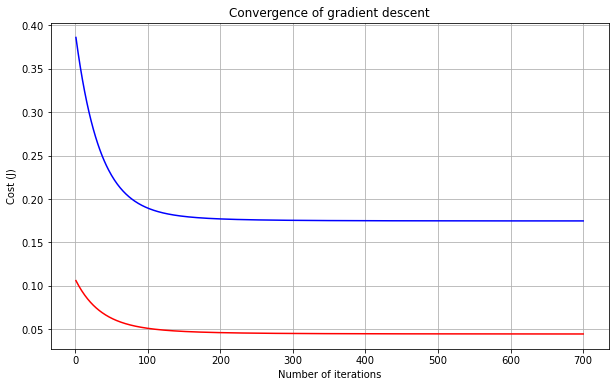

In [96]:
theta = np.zeros(X.shape[1])
iterations = 700; 
alpha = 0.01; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history)

### 2b

In [97]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        pass

In [98]:
print(used_train_x.shape)
used_train_x.head()

(436, 10)


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
462,0.047278,-0.570187,0.224410,0,0,1,0,0,-0.805741,0
166,0.047278,-0.570187,-0.929397,1,0,1,0,1,1.517692,1
539,-1.308863,-0.570187,-0.929397,0,0,0,0,0,0.355976,0
163,0.047278,-0.570187,-0.929397,1,1,1,0,1,-0.805741,1
466,0.047278,-0.570187,0.224410,0,0,0,0,0,-0.805741,0


In [99]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 10)


,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
76,0.047278,1.421812,1.378217,1,0,0,0,1,-0.805741,1
308,0.047278,-0.570187,0.224410,1,0,1,0,0,0.355976,0
341,-1.308863,1.421812,-0.929397,1,0,1,0,0,1.517692,0
459,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0
508,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0


In [100]:
print(y_train_values.shape)
y_train_values.head()

(436,)


462   -0.902611
166    0.296069
539   -1.558139
163    0.352257
466   -0.940069
Name: price, dtype: float64

In [101]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


76     1.007785
308   -0.322000
341   -0.490565
459   -0.883881
508   -1.164822
Name: price, dtype: float64

In [102]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

print(X.shape)
print(Y.shape)

(436, 11)
(436,)


In [103]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

print(valid_X.shape)
print(valid_Y.shape)

(109, 11)
(109,)


In [104]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[ 1.          0.04727831 -0.57018671 ...  0.         -0.80574124
   0.        ]
 [ 1.          0.04727831 -0.57018671 ...  1.          1.51769249
   1.        ]
 [ 1.         -1.30886273 -0.57018671 ...  0.          0.35597563
   0.        ]
 ...
 [ 1.          0.04727831  1.42181174 ...  0.         -0.80574124
   0.        ]
 [ 1.          1.40341936 -0.57018671 ...  0.          0.35597563
   0.        ]
 [ 1.          0.04727831  1.42181174 ...  1.         -0.80574124
   1.        ]]

Y=
[-9.02610715e-01  2.96068921e-01 -1.55813864e+00  3.52257029e-01
 -9.40069453e-01 -4.10597262e-02  7.08115046e-01 -1.57181816e-01
  4.27174507e-01 -1.20228062e+00 -1.23973936e+00  2.01917090e+00
 -5.09293959e-01 -3.03270897e-01  7.13164897e-02 -5.69227941e-01
 -2.09624050e-01 -6.77858283e-01 -9.40069453e-01  4.45903876e-01
 -7.34046391e-01 -1.12736315e+00 -5.65482067e-01 -2.05878176e-01
 -9.77528192e-01 -4.15647113e-01  7.13164897e-02 -7.15317022e-01
 -1.72165311e-01  1.46233967e-01 -1.23973936e+

In [105]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(11,)
(436, 11)
(109, 11)


In [106]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y, theta, debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y, theta, debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.392210346601193
The validation cost for given values of theta = 0.10778965339880689


Final values:
	theta = [-0.43827524  0.07963233  0.31303188  0.2120275   0.15576924  0.26622065
  0.14431297  0.09775084  0.40002737  0.24278348  0.43649484]
	cost = 0.16376348722687362
	validation_cost = 0.03970757836377609


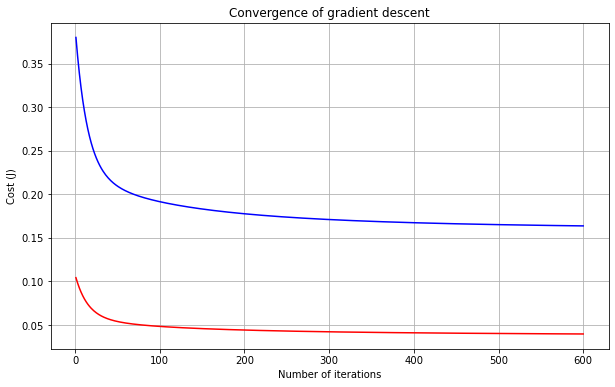

In [114]:
theta = np.zeros(X.shape[1])
iterations = 600; 
alpha = 0.025; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history)

# Question 3

## setup

## 3a

## 3b